## <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea">Assignment 3: Bancassurance</span>

&nbsp;

<p align="center" style="font-family: Arial;color:#0e92ea;font-size:1em;">
Build a model to identify the positively responding customers who have a higher probability of purchasing the insurance
    
</p>

##  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Contents:</span>

<ol style="font-family: Arial;color:#0e92ea;font-size:1em;">
    <li>Data Overview and EDA</li>
    <li>Outlier Treatment and Feature Engineering</li>
    <li>Building Decision Tree Model and Analysis</li>
    <li>Building Logistic Regression Model and Analysis</li>
    <li>Conclusions</li>
</ol>

In [1]:
import os
import warnings
import pprint
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from datetime import datetime
from matplotlib import gridspec
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from os import system
from IPython.display import Image


warnings.filterwarnings('ignore')

main_data = pd.read_csv('My Bank.csv')

default_color_palette  = ["#03A9F4","#7C4DFF", "#FF5252", "#D50000", "#FF6F00", "#0288D1", "#7C4DFF"] 
stats_colors           = {'Mean':'#D50000', 'Mode':'#FF3D00', 'Median':'#2962FF'} # Set standard colors for mean, mode and median to use accross entire notebook.
gender_color_palette   = {"Female":"#E91E63", "Male":"#42A5F5"} # Gender based colors.

####  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> 1. Data Overview and EDA:
    
<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#0e92ea"> General Observations:
<ul>
    <li>The data has no mising values.</li>
</ul>

In [2]:
main_data.head(10)

,CUST_ID,TARGET,AGE,GENDER,BALANCE,OCCUPATION,SCR,HOLDING_PERIOD,ACC_TYPE,ACC_OP_DATE,...,NO_OF_CHQ_DR_TXNS,FLG_HAS_CC,AMT_ATM_DR,AMT_BR_CSH_WDL_DR,AMT_CHQ_DR,AMT_NET_DR,AMT_MOB_DR,FLG_HAS_ANY_CHGS,FLG_HAS_NOMINEE,FLG_HAS_OLD_LOAN
0,C7927,0,27,M,3383.75,SELF-EMP,776,30,SA,3/23/2005,...,0,0,13100,0,0,973557.0,0,0,1,1
1,C6877,0,47,M,287489.04,SAL,324,28,SA,10-11-2008,...,0,0,6600,0,0,799813.0,0,1,1,0
2,C19922,0,40,M,18216.88,SELF-EMP,603,2,SA,4/26/2012,...,2,0,11200,561120,49320,997570.0,0,1,1,1
3,C8183,0,53,M,71720.48,SAL,196,13,CA,07-04-2008,...,4,0,26100,673590,60780,741506.0,71388,0,1,0
4,C12123,0,36,M,1671622.89,PROF,167,24,SA,12/29/2001,...,0,0,0,808480,0,0.0,0,0,1,0
5,C257,0,42,F,521685.69,PROF,493,26,SA,06-07-2001,...,0,1,18500,379310,0,0.0,0,0,1,1
6,C8300,0,30,M,204458.60,PROF,479,14,SA,8/25/2002,...,4,0,6200,0,10580,770065.0,0,1,0,1
7,C5999,0,53,F,58516.34,SAL,562,25,CA,3/15/2009,...,0,0,0,945160,0,0.0,0,0,1,1
8,C5692,0,42,F,13158.14,SELF-EMP,105,15,SA,02-08-2010,...,1,1,35400,198430,51490,326421.0,170332,0,1,1
9,C3241,0,30,M,831150.18,PROF,170,13,SA,03-02-2008,...,4,0,18000,869880,32610,0.0,0,0,0,0


In [3]:
# Drop The Id Column
main_data.drop("CUST_ID", axis=1, inplace=True)
main_data.head(10)

,TARGET,AGE,GENDER,BALANCE,OCCUPATION,SCR,HOLDING_PERIOD,ACC_TYPE,ACC_OP_DATE,LEN_OF_RLTN_IN_MNTH,...,NO_OF_CHQ_DR_TXNS,FLG_HAS_CC,AMT_ATM_DR,AMT_BR_CSH_WDL_DR,AMT_CHQ_DR,AMT_NET_DR,AMT_MOB_DR,FLG_HAS_ANY_CHGS,FLG_HAS_NOMINEE,FLG_HAS_OLD_LOAN
0,0,27,M,3383.75,SELF-EMP,776,30,SA,3/23/2005,146,...,0,0,13100,0,0,973557.0,0,0,1,1
1,0,47,M,287489.04,SAL,324,28,SA,10-11-2008,104,...,0,0,6600,0,0,799813.0,0,1,1,0
2,0,40,M,18216.88,SELF-EMP,603,2,SA,4/26/2012,61,...,2,0,11200,561120,49320,997570.0,0,1,1,1
3,0,53,M,71720.48,SAL,196,13,CA,07-04-2008,107,...,4,0,26100,673590,60780,741506.0,71388,0,1,0
4,0,36,M,1671622.89,PROF,167,24,SA,12/29/2001,185,...,0,0,0,808480,0,0.0,0,0,1,0
5,0,42,F,521685.69,PROF,493,26,SA,06-07-2001,192,...,0,1,18500,379310,0,0.0,0,0,1,1
6,0,30,M,204458.60,PROF,479,14,SA,8/25/2002,177,...,4,0,6200,0,10580,770065.0,0,1,0,1
7,0,53,F,58516.34,SAL,562,25,CA,3/15/2009,99,...,0,0,0,945160,0,0.0,0,0,1,1
8,0,42,F,13158.14,SELF-EMP,105,15,SA,02-08-2010,88,...,1,1,35400,198430,51490,326421.0,170332,0,1,1
9,0,30,M,831150.18,PROF,170,13,SA,03-02-2008,111,...,4,0,18000,869880,32610,0.0,0,0,0,0


In [4]:
print(f"Rows : {main_data.shape[0]} x Columns : {main_data.shape[1]}")

Rows : 20000 x Columns : 25


In [5]:
'''
Input:
Pandas DataFrame

Output:
Displays DataFrame structure 
(columns, nulls and non nulls counts and percentage highlighing columns with most number of nulls)

Retunrs:
N/A
'''
def info(dataFrame):
    nulls_series             = dataFrame.isna().sum()         # Get a series counting number of empty values for each column
    nonnulls_series          = dataFrame.notnull().sum()      # Get a series counting number of non empty valuesfor each column 
    nulls_percentage         = ((nulls_series * 100)/(nulls_series + nonnulls_series)).astype(float)
    column_datatypes         = dataFrame.dtypes               # Get a series containing data types for each column 

    nulls_count_df = pd.concat(
        [nulls_series, nonnulls_series, nulls_percentage, column_datatypes],
        axis=1,
        keys=["Nulls", "Non-Nulls","Nulls %", "Type"], 
        sort=True)
    cm = sns.light_palette("red", as_cmap=True)
    display(nulls_count_df.style.background_gradient(cmap=cm, subset=pd.IndexSlice[:, ['Nulls %']]).format(formatter={('Nulls %'): "{:.2f}%"}))    

In [6]:
info(main_data)

,Nulls,Non-Nulls,Nulls %,Type
ACC_OP_DATE,0,20000,0.00%,object
ACC_TYPE,0,20000,0.00%,object
AGE,0,20000,0.00%,int64
AMT_ATM_DR,0,20000,0.00%,int64
AMT_BR_CSH_WDL_DR,0,20000,0.00%,int64
AMT_CHQ_DR,0,20000,0.00%,int64
AMT_MOB_DR,0,20000,0.00%,int64
AMT_NET_DR,0,20000,0.00%,float64
BALANCE,0,20000,0.00%,float64
FLG_HAS_ANY_CHGS,0,20000,0.00%,int64


In [7]:
main_data.nunique()

TARGET                         2
AGE                           35
GENDER                         3
BALANCE                     9924
OCCUPATION                     4
SCR                          896
HOLDING_PERIOD                31
ACC_TYPE                       2
ACC_OP_DATE                 4869
LEN_OF_RLTN_IN_MNTH          193
NO_OF_L_CR_TXNS               76
NO_OF_BR_CSH_WDL_DR_TXNS      16
NO_OF_ATM_DR_TXNS             26
NO_OF_NET_DR_TXNS             17
NO_OF_MOB_DR_TXNS              6
NO_OF_CHQ_DR_TXNS             16
FLG_HAS_CC                     2
AMT_ATM_DR                   646
AMT_BR_CSH_WDL_DR           7369
AMT_CHQ_DR                  4891
AMT_NET_DR                  4847
AMT_MOB_DR                  2312
FLG_HAS_ANY_CHGS               2
FLG_HAS_NOMINEE                2
FLG_HAS_OLD_LOAN               2
dtype: int64

In [8]:
main_data[main_data.select_dtypes(include=['object']).columns.tolist()].head(10)

,GENDER,OCCUPATION,ACC_TYPE,ACC_OP_DATE
0,M,SELF-EMP,SA,3/23/2005
1,M,SAL,SA,10-11-2008
2,M,SELF-EMP,SA,4/26/2012
3,M,SAL,CA,07-04-2008
4,M,PROF,SA,12/29/2001
5,F,PROF,SA,06-07-2001
6,M,PROF,SA,8/25/2002
7,F,SAL,CA,3/15/2009
8,F,SELF-EMP,SA,02-08-2010
9,M,PROF,SA,03-02-2008


In [9]:
main_data.describe().T

,count,mean,std,min,25%,50%,75%,max
TARGET,20000.0,0.125600,0.331406,0.0,0.000,0.000,0.00,1.00
AGE,20000.0,38.418150,9.577985,21.0,30.000,38.000,46.00,55.00
BALANCE,20000.0,511362.192118,723592.961792,0.0,64754.025,231675.845,653876.85,8360430.57
SCR,20000.0,440.150300,249.887582,100.0,227.000,364.000,644.00,999.00
HOLDING_PERIOD,20000.0,14.955650,8.642634,1.0,7.000,15.000,22.00,31.00
LEN_OF_RLTN_IN_MNTH,20000.0,125.239300,54.953936,29.0,79.000,125.000,172.00,221.00
NO_OF_L_CR_TXNS,20000.0,12.348050,12.151921,0.0,6.000,10.000,14.00,75.00
NO_OF_BR_CSH_WDL_DR_TXNS,20000.0,1.883000,2.263596,0.0,1.000,1.000,2.00,15.00
NO_OF_ATM_DR_TXNS,20000.0,1.028950,1.497239,0.0,0.000,1.000,1.00,25.00
NO_OF_NET_DR_TXNS,20000.0,1.172450,2.404246,0.0,0.000,0.000,1.00,22.00


<p>Looking at all the columns with type='object', all of them are cateorial while the ACC_OP_DATE is a DateTime type</p>

In [10]:
def ConvertColTo(toType, column_names=np.nan):
    for col_name in column_names:
        if col_name != 'ACC_OP_DATE' and col_name != 'TARGET':
            main_data[col_name] = main_data[col_name].astype(toType)
        elif col_name == 'ACC_OP_DATE':
            main_data[col_name] = pd.to_datetime(main_data[col_name])
    main_data.info()

cols = main_data.nunique()[main_data.nunique().values <= 5].index.values
print(cols)
ConvertColTo("category", cols)

['TARGET' 'GENDER' 'OCCUPATION' 'ACC_TYPE' 'FLG_HAS_CC' 'FLG_HAS_ANY_CHGS'
 'FLG_HAS_NOMINEE' 'FLG_HAS_OLD_LOAN']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   TARGET                    20000 non-null  int64   
 1   AGE                       20000 non-null  int64   
 2   GENDER                    20000 non-null  category
 3   BALANCE                   20000 non-null  float64 
 4   OCCUPATION                20000 non-null  category
 5   SCR                       20000 non-null  int64   
 6   HOLDING_PERIOD            20000 non-null  int64   
 7   ACC_TYPE                  20000 non-null  category
 8   ACC_OP_DATE               20000 non-null  object  
 9   LEN_OF_RLTN_IN_MNTH       20000 non-null  int64   
 10  NO_OF_L_CR_TXNS           20000 non-null  int64   
 11  NO_OF_BR_CSH_WDL_DR_TXNS  20000 non-null  in

In [11]:
'''
Input:
N/A

Output:
Go through each categorial column and print unique values for that column.

Retunrs:
N/A
'''
def CountUniqueValues():
    col_names = main_data.select_dtypes(include=['category']).columns.tolist()
    print(col_names)
    for col_name in col_names:
        print(f"\n======================='{col_name}'==================\n")
        for unique_col_value in  main_data[col_name].unique().tolist():
            total_count = main_data[col_name].count()
            unique_values_count = main_data[main_data[col_name] == unique_col_value][col_name].count()
            percentage = str(round((unique_values_count/total_count) * 100, 2))
            print(f"{unique_col_value} \t: {unique_values_count} ({percentage}%)")
        print(f"\n=========================================================\n")


CountUniqueValues()

['GENDER', 'OCCUPATION', 'ACC_TYPE', 'FLG_HAS_CC', 'FLG_HAS_ANY_CHGS', 'FLG_HAS_NOMINEE', 'FLG_HAS_OLD_LOAN']

======================='GENDER'==================

M 	: 14376 (71.88%)
F 	: 5433 (27.16%)
O 	: 191 (0.96%)



======================='OCCUPATION'==================

SELF-EMP 	: 3568 (17.84%)
SAL 	: 5855 (29.28%)
PROF 	: 5417 (27.08%)
SENP 	: 5160 (25.8%)



======================='ACC_TYPE'==================

SA 	: 15759 (78.8%)
CA 	: 4241 (21.2%)



======================='FLG_HAS_CC'==================

0 	: 13892 (69.46%)
1 	: 6108 (30.54%)



======================='FLG_HAS_ANY_CHGS'==================

0 	: 17788 (88.94%)
1 	: 2212 (11.06%)



======================='FLG_HAS_NOMINEE'==================

1 	: 18023 (90.12%)
0 	: 1977 (9.88%)



======================='FLG_HAS_OLD_LOAN'==================

1 	: 9859 (49.3%)
0 	: 10141 (50.7%)




In [12]:
main_data.duplicated(keep=False).sum()

14997

In [13]:
main_data[main_data.duplicated(keep=False)]

,TARGET,AGE,GENDER,BALANCE,OCCUPATION,SCR,HOLDING_PERIOD,ACC_TYPE,ACC_OP_DATE,LEN_OF_RLTN_IN_MNTH,...,NO_OF_CHQ_DR_TXNS,FLG_HAS_CC,AMT_ATM_DR,AMT_BR_CSH_WDL_DR,AMT_CHQ_DR,AMT_NET_DR,AMT_MOB_DR,FLG_HAS_ANY_CHGS,FLG_HAS_NOMINEE,FLG_HAS_OLD_LOAN
0,0,27,M,3383.75,SELF-EMP,776,30,SA,3/23/2005,146,...,0,0,13100,0,0,973557.0,0,0,1,1
1,0,47,M,287489.04,SAL,324,28,SA,10-11-2008,104,...,0,0,6600,0,0,799813.0,0,1,1,0
2,0,40,M,18216.88,SELF-EMP,603,2,SA,4/26/2012,61,...,2,0,11200,561120,49320,997570.0,0,1,1,1
3,0,53,M,71720.48,SAL,196,13,CA,07-04-2008,107,...,4,0,26100,673590,60780,741506.0,71388,0,1,0
4,0,36,M,1671622.89,PROF,167,24,SA,12/29/2001,185,...,0,0,0,808480,0,0.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,0,54,F,201441.95,SENP,991,19,SA,1/26/1999,220,...,0,0,0,0,0,0.0,0,0,0,0
19996,0,37,F,46624.98,SELF-EMP,299,11,SA,05-03-2013,49,...,4,0,17200,705740,24300,902772.0,46829,0,1,0
19997,0,30,M,142433.53,PROF,722,11,SA,11-01-2007,115,...,5,0,33400,83740,62210,0.0,132010,0,1,0
19998,0,46,M,394654.75,SAL,234,4,SA,8/22/2006,129,...,4,1,7700,195790,43550,0.0,0,0,1,0


In [14]:
# Deletes duplicates leaving the unique rows in each set of duplicates
main_data = main_data[main_data.duplicated(keep=False)].drop_duplicates()

In [15]:
main_data.duplicated(keep=False).sum()

0

In [16]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5348 entries, 0 to 19822
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   TARGET                    5348 non-null   int64   
 1   AGE                       5348 non-null   int64   
 2   GENDER                    5348 non-null   category
 3   BALANCE                   5348 non-null   float64 
 4   OCCUPATION                5348 non-null   category
 5   SCR                       5348 non-null   int64   
 6   HOLDING_PERIOD            5348 non-null   int64   
 7   ACC_TYPE                  5348 non-null   category
 8   ACC_OP_DATE               5348 non-null   object  
 9   LEN_OF_RLTN_IN_MNTH       5348 non-null   int64   
 10  NO_OF_L_CR_TXNS           5348 non-null   int64   
 11  NO_OF_BR_CSH_WDL_DR_TXNS  5348 non-null   int64   
 12  NO_OF_ATM_DR_TXNS         5348 non-null   int64   
 13  NO_OF_NET_DR_TXNS         5348 non-null   int64

In [17]:
CountUniqueValues()

['GENDER', 'OCCUPATION', 'ACC_TYPE', 'FLG_HAS_CC', 'FLG_HAS_ANY_CHGS', 'FLG_HAS_NOMINEE', 'FLG_HAS_OLD_LOAN']

======================='GENDER'==================

M 	: 3865 (72.27%)
F 	: 1435 (26.83%)
O 	: 48 (0.9%)



======================='OCCUPATION'==================

SELF-EMP 	: 951 (17.78%)
SAL 	: 1599 (29.9%)
PROF 	: 1418 (26.51%)
SENP 	: 1380 (25.8%)



======================='ACC_TYPE'==================

SA 	: 4235 (79.19%)
CA 	: 1113 (20.81%)



======================='FLG_HAS_CC'==================

0 	: 3705 (69.28%)
1 	: 1643 (30.72%)



======================='FLG_HAS_ANY_CHGS'==================

0 	: 4765 (89.1%)
1 	: 583 (10.9%)



======================='FLG_HAS_NOMINEE'==================

1 	: 4812 (89.98%)
0 	: 536 (10.02%)



======================='FLG_HAS_OLD_LOAN'==================

1 	: 2638 (49.33%)
0 	: 2710 (50.67%)




In [18]:
'''
Input:
Axis, column name/x-axis, hue name

Output:
Displays a count plot.

Retunrs:
N/A
''' 
def HistBoxplot(box_chart_ax, hist_chart_ax, x_axis):
    sns.boxplot(
        data=main_data,
        x=main_data[x_axis],
        showmeans=True,
        ax=box_chart_ax)
    
    sns.histplot(
        data=main_data,
        x=main_data[x_axis],
        kde=True,
        ax=hist_chart_ax)
    
    hist_chart_ax.axvline(main_data[x_axis].mean(),                 # Get the mean of the values in the given column and draw a vertical line that cuts the chart on the mean value 
               color=stats_colors['Mean'],                                  # Use on of the colors predefined on this notebook
               label='Mean',                                                # Set the label to be diplayed on the legend
               linestyle="dashed");                                         # Make the line have dashes
    
    hist_chart_ax.axvline(main_data[x_axis].median(),               # Plot the median line on the chart.
               color=stats_colors['Median'],                                # Use on of the colors predefined on this notebook
               label='Median',                                              # Set the label to be diplayed on the legend
               linestyle="dashed");                                         # Make the line have dashes
    
    hist_chart_ax.axvline(main_data[x_axis].mode()[0],              # Plot the mode line on the chart.
               color=stats_colors['Mode'],                                  # Use on of the colors predefined on this notebook 
               label='Mode',                                                # Set the label to be diplayed on the legend
               linestyle="dashed");                                         # Make the line have dashes
    
    hist_chart_ax.legend(loc='upper right')

def PlotHistBoxGrid():
    col_names = main_data.select_dtypes(include=['float', 'int64']).columns.tolist()
    print(col_names)

    col_index = 0
    for r in range(0, int(len(col_names)), 3):
        fig, (box, hist) = plt.subplots(
            nrows=2,                                                                # Number of rows of the grid
            ncols=3,                                                                # Number of columns of the grid.
            figsize=(15,4),
            gridspec_kw={"height_ratios" : (0.25,0.5)},
            constrained_layout=True)

        for index in range(0, 3):
            if col_index < int(len(col_names)):
                HistBoxplot(box.flat[index], hist.flat[index], col_names[col_index])
            col_index += 1
            
'''
Input:
Column name

Output:
A series containing interquatile range values

Retunrs:
A series containing interquatile range values
''' 
def Get_IQR(col_name):
    quartiles = np.quantile(main_data[col_name][main_data[col_name].notnull()], [.2, .75])
    power_4iqr = 1 * (quartiles[1] - quartiles[0])
    print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {power_4iqr}')
    outlier_powers = main_data.loc[np.abs(main_data[col_name] - main_data[col_name].median()) > power_4iqr, col_name]
    print(outlier_powers.array) 
    
    return quartiles

['TARGET', 'AGE', 'BALANCE', 'SCR', 'HOLDING_PERIOD', 'LEN_OF_RLTN_IN_MNTH', 'NO_OF_L_CR_TXNS', 'NO_OF_BR_CSH_WDL_DR_TXNS', 'NO_OF_ATM_DR_TXNS', 'NO_OF_NET_DR_TXNS', 'NO_OF_MOB_DR_TXNS', 'NO_OF_CHQ_DR_TXNS', 'AMT_ATM_DR', 'AMT_BR_CSH_WDL_DR', 'AMT_CHQ_DR', 'AMT_NET_DR', 'AMT_MOB_DR']


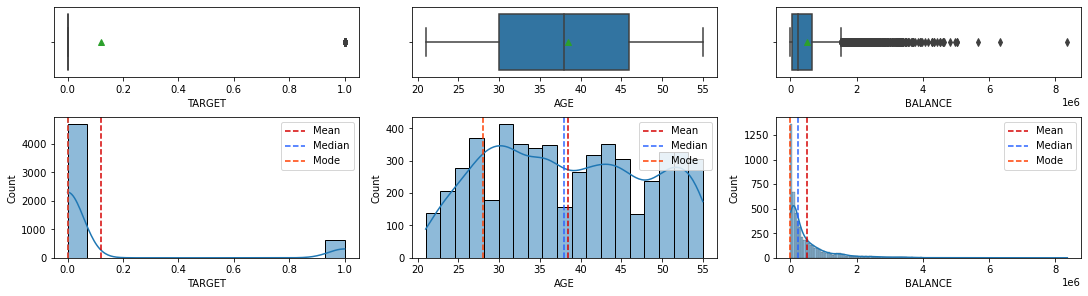

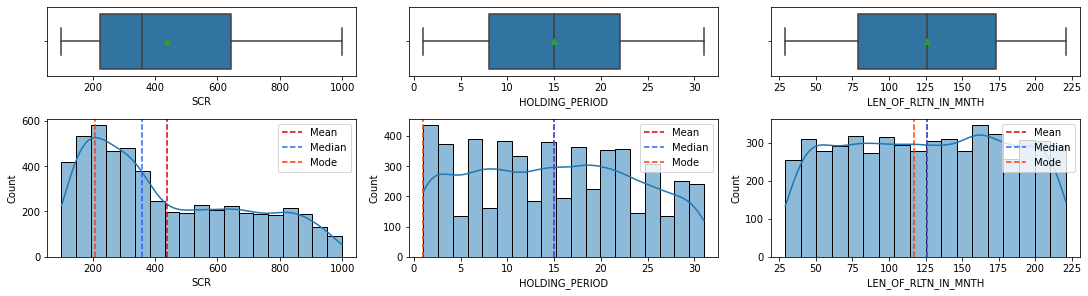

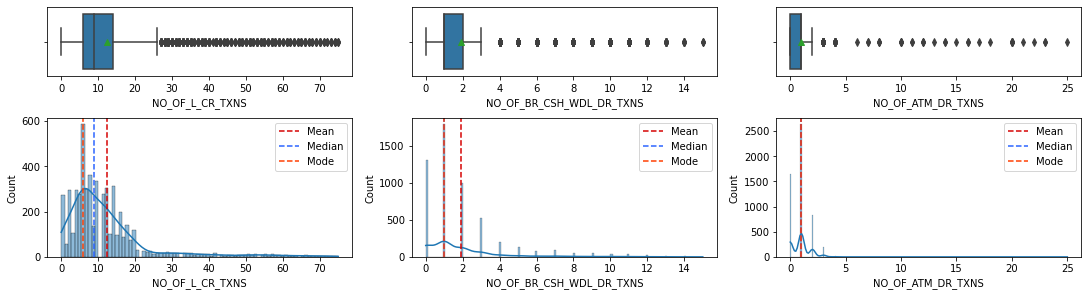

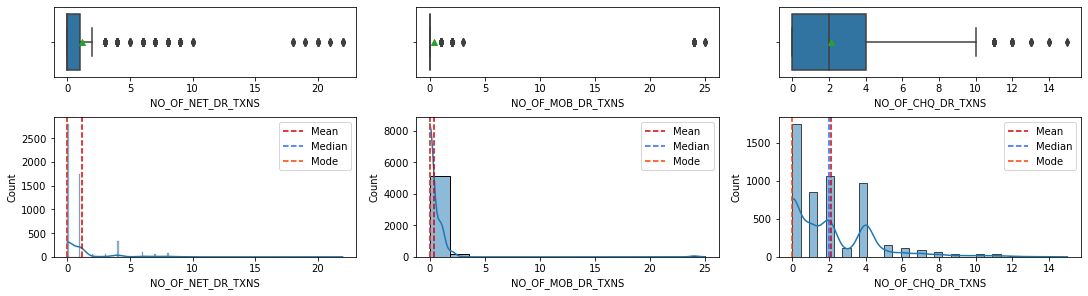

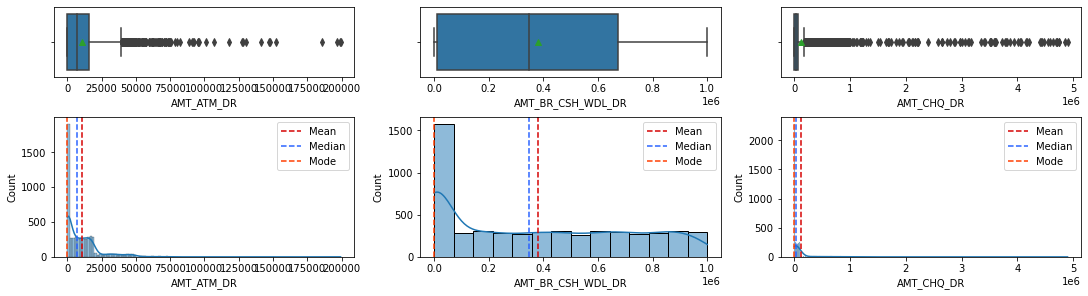

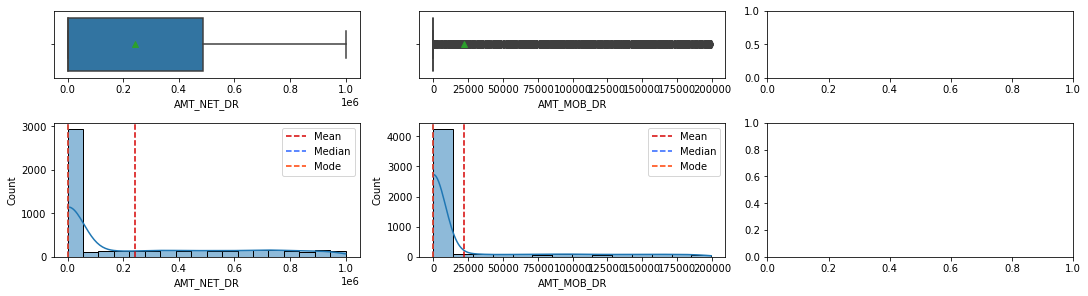

In [19]:
PlotHistBoxGrid()

In [20]:
main_data[main_data['NO_OF_L_CR_TXNS'] > 30].shape

(389, 25)

In [21]:
main_data[main_data['AMT_NET_DR'] <= 0.1].shape

(2802, 25)

['TARGET', 'AGE', 'BALANCE', 'SCR', 'HOLDING_PERIOD', 'LEN_OF_RLTN_IN_MNTH', 'NO_OF_L_CR_TXNS', 'NO_OF_BR_CSH_WDL_DR_TXNS', 'NO_OF_ATM_DR_TXNS', 'NO_OF_NET_DR_TXNS', 'NO_OF_MOB_DR_TXNS', 'NO_OF_CHQ_DR_TXNS', 'AMT_ATM_DR', 'AMT_BR_CSH_WDL_DR', 'AMT_CHQ_DR', 'AMT_NET_DR', 'AMT_MOB_DR']


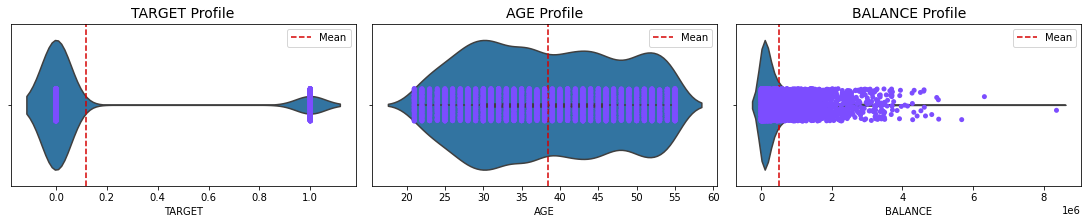

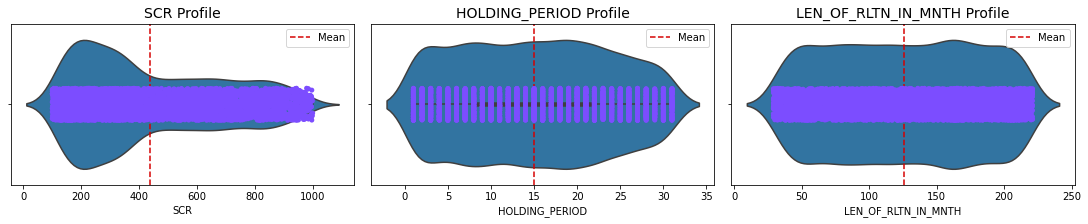

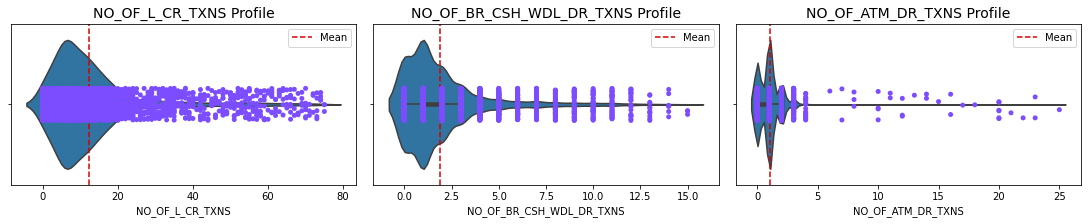

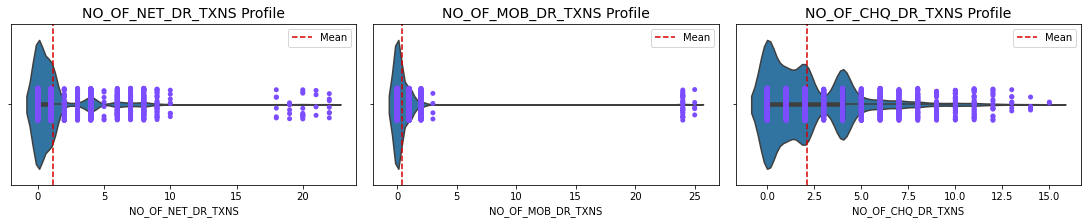

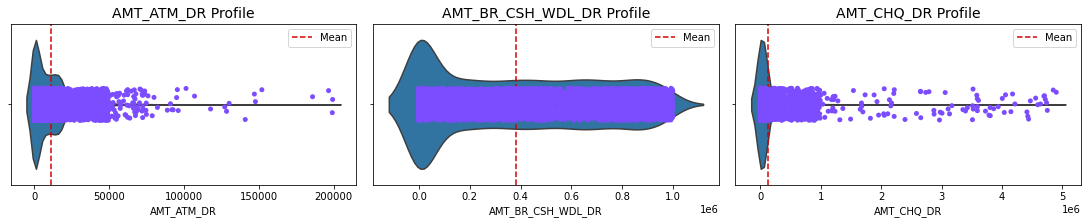

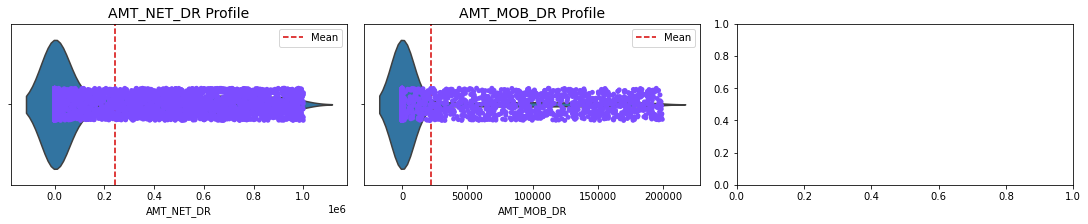

In [22]:
def plot_box_chart(ax, df_column_name):                                     # Helper function to plot the violin plot.
    ax = sns.violinplot(                                                    # Plot the violin chart
        x=df_column_name,                                                   # Set the input column name as the x-axis
        data=main_data,                                                     # Use the main data loaded on start of the notebook
        ax = ax,                                                            # plot the violin on the given grid axis
        kind="box")                                                         # Use boxplot
    
    sns.stripplot(x=main_data[df_column_name],                              # Plot the stripplot show were most of the data in the violin lies
                  ax = ax,                                                  # Plot the violin on the given grid axis
                  color=default_color_palette[1],                           # use one the note-book'spredefined colors for the dots
                  jitter=True)                                              # Allows stripplot to visualize number of datapoints for a given x-axis 
    
    ax.axvline(main_data[df_column_name].mean(),                            # Plot the mean on the same axis as the violinplot. 
               color=default_color_palette[3],                              # Use one of the notebook's predeined colors
               label='Mean',                                                # Set the label to display on the legend
               linestyle="dashed");                                         # set the line style to have dashes.

    ax.set_xlabel(df_column_name)                                           # Set the x-axis label of the chart.                                           
    ax.set_title(df_column_name + ' Profile', fontsize=14)                  # Set the title of the chart
    ax.legend(loc='upper right')  

def PlotBoxPlotGrid():
    col_names = main_data.select_dtypes(include=['float', 'int64']).columns.tolist()
    print(col_names)

    col_index = 0
    for r in range(0, int(len(col_names)), 3):
        fig, box = plt.subplots(
            nrows=1,                                                                # Number of rows of the grid
            ncols=3,                                                                # Number of columns of the grid.
            figsize=(15,3),
            constrained_layout=True)

        for index in range(0, 3):
            if col_index < int(len(col_names)):
                plot_box_chart(box.flat[index], col_names[col_index])
            col_index += 1
            
PlotBoxPlotGrid()

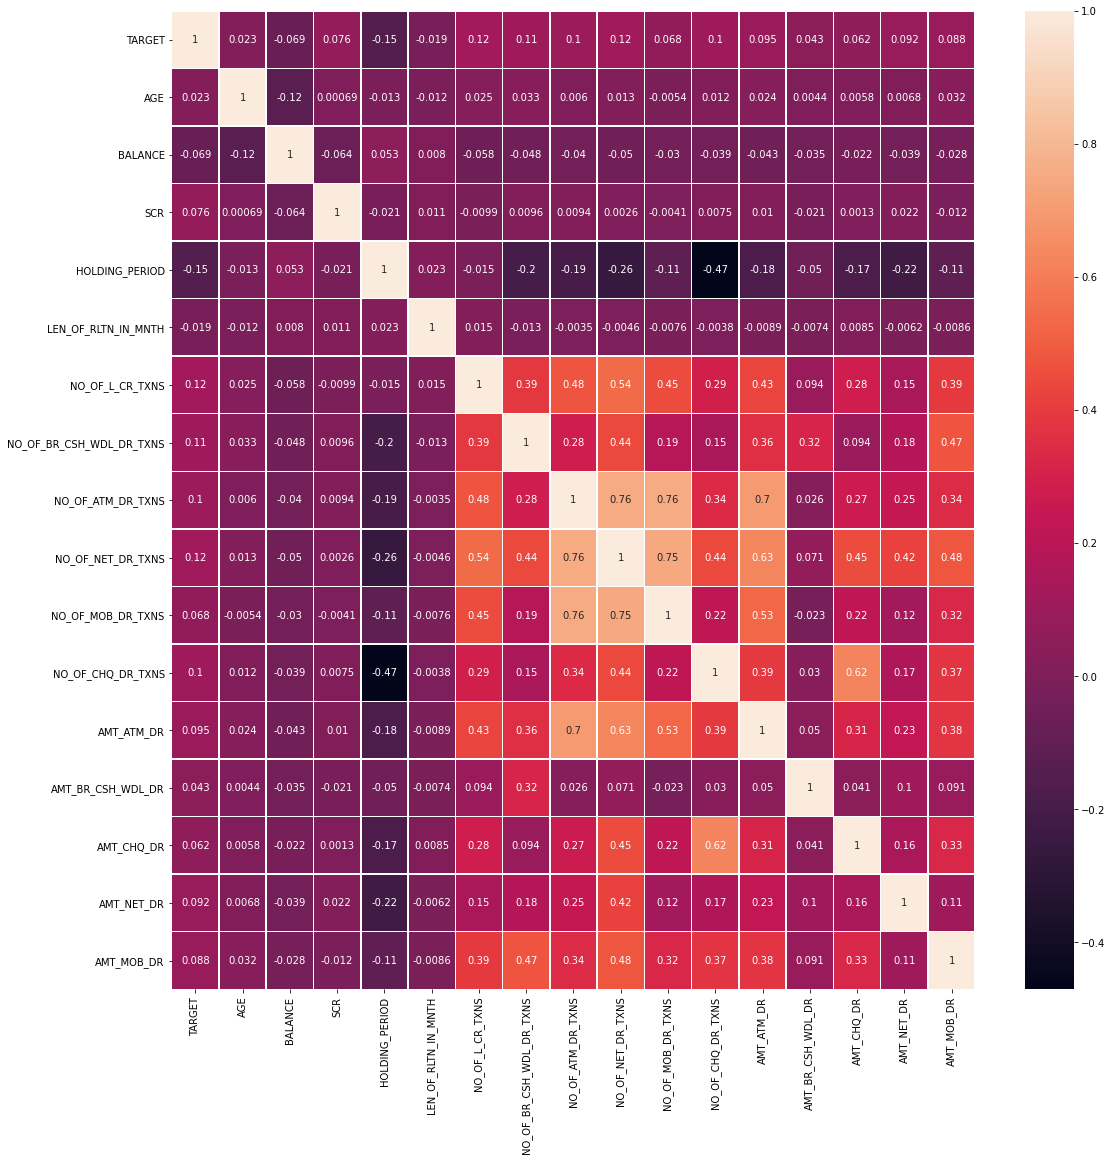

In [23]:
fig, ax = plt.subplots(figsize=(18,18)) 
sns.heatmap(data=main_data.corr(), annot=True, linewidths=.5, ax=ax)
plt.show()

In [24]:
# replace columns with  integers in the appropreate order
# new_feature_cols = {
#     "TXNS_COLS" : ['NO_OF_L_CR_TXNS', 'NO_OF_BR_CSH_WDL_DR_TXNS', 'NO_OF_ATM_DR_TXNS', 'NO_OF_NET_DR_TXNS', 'NO_OF_MOB_DR_TXNS', 'NO_OF_CHQ_DR_TXNS'],
#     "DR_COLS"   : ['AMT_ATM_DR', 'AMT_CHQ_DR', 'AMT_NET_DR', 'AMT_MOB_DR']
# }
# replace_struct = {
#     "NO_OF_TXNS"    : main_data[new_feature_cols['TXNS_COLS']].mean(axis=1),
#     "AMT_DR"        : main_data[new_feature_cols['DR_COLS']].mean(axis=1)
# }

# main_data['NO_OF_TXNS'] = main_data[new_feature_cols['TXNS_COLS']].mean(axis=1)
# main_data['AMT_DR']     = main_data[new_feature_cols['DR_COLS']].mean(axis=1)

# main_data.drop(new_feature_cols['TXNS_COLS'], axis=1, inplace=True)
# main_data.drop(new_feature_cols['DR_COLS'], axis=1, inplace=True)

# main_data.head(10)

In [25]:
col_names = main_data.select_dtypes(include=['float', 'int64']).columns.tolist()
for col_name in col_names:
    print(f"\n\n==========================={col_name}====================\n")
    main_data[col_name] = np.where(
        main_data[col_name] < Get_IQR(col_name)[0],
        main_data[col_name].mean(),
        main_data[col_name])
    print(f"\n\n==========================={col_name}====================\n")



===========================TARGET====================

Q1 = 0.0, Q3 = 0.0, 4*IQR = 0.0
<PandasArray>
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
 ...
 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Length: 637, dtype: int64


===========================TARGET====================



===========================AGE====================

Q1 = 29.0, Q3 = 46.0, 4*IQR = 17.0
<PandasArray>
[]
Length: 0, dtype: int64


===========================AGE====================



===========================BALANCE====================

Q1 = 47248.98000000001, Q3 = 647052.7, 4*IQR = 599803.72
<PandasArray>
[1671622.89, 1136890.47, 1743832.48, 1002330.71, 2532663.66, 1097597.16,
  880516.16, 1036410.61, 1366564.05,  884660.18,
 ...
 1645982.68, 2693151.96, 1963593.45, 1419617.15, 1464278.95, 2190022.55,
 1277926.97, 1003384.27, 3241052.51, 1112056.44]
Length: 1008, dtype: float64


===========================BALANCE====================



===========================SCR====================

Q1 = 205.0, Q3 = 643.0, 4*IQR = 438.0
<Panda

In [27]:
oneHotCols = main_data.select_dtypes(include=['category']).columns.tolist()
main_data = pd.get_dummies(main_data, columns=oneHotCols, drop_first=True)

main_data.head(10)

,TARGET,AGE,BALANCE,SCR,HOLDING_PERIOD,ACC_OP_DATE,LEN_OF_RLTN_IN_MNTH,NO_OF_L_CR_TXNS,NO_OF_BR_CSH_WDL_DR_TXNS,NO_OF_ATM_DR_TXNS,...,GENDER_M,GENDER_O,OCCUPATION_SAL,OCCUPATION_SELF-EMP,OCCUPATION_SENP,ACC_TYPE_SA,FLG_HAS_CC_1,FLG_HAS_ANY_CHGS_1,FLG_HAS_NOMINEE_1,FLG_HAS_OLD_LOAN_1
0,0.0,38.432685,5.049696e+05,776.000000,30.000000,3/23/2005,146.00000,7.000000,0.0,1.0,...,1,0,0,1,0,1,0,0,1,1
1,0.0,47.000000,2.874890e+05,324.000000,28.000000,10-11-2008,104.00000,8.000000,0.0,1.0,...,1,0,1,0,0,1,0,1,1,0
2,0.0,40.000000,5.049696e+05,603.000000,14.990277,4/26/2012,125.80086,10.000000,1.0,1.0,...,1,0,0,1,0,1,0,1,1,1
3,0.0,53.000000,7.172048e+04,437.383695,13.000000,07-04-2008,107.00000,36.000000,4.0,2.0,...,1,0,1,0,0,0,0,0,1,0
4,0.0,36.000000,1.671623e+06,437.383695,24.000000,12/29/2001,185.00000,20.000000,1.0,0.0,...,1,0,0,0,0,1,0,0,1,0
6,0.0,30.000000,2.044586e+05,479.000000,14.000000,8/25/2002,177.00000,6.000000,0.0,1.0,...,1,0,0,0,0,1,0,1,0,1
7,0.0,53.000000,5.851634e+04,562.000000,25.000000,3/15/2009,99.00000,14.000000,3.0,0.0,...,0,0,1,0,0,0,0,0,1,1
8,0.0,42.000000,5.049696e+05,437.383695,15.000000,02-08-2010,88.00000,18.000000,6.0,2.0,...,0,0,0,1,0,1,1,0,1,1
10,0.0,52.000000,5.049696e+05,395.000000,7.000000,1/26/2004,160.00000,7.000000,1.0,1.0,...,1,0,0,1,0,1,0,0,1,1
11,0.0,43.000000,2.726070e+05,437.383695,24.000000,03-06-2002,183.00000,12.274121,2.0,1.0,...,1,0,0,0,0,0,1,0,1,0


In [28]:
main_data.drop(['AGE', 'BALANCE', 'ACC_OP_DATE', 'LEN_OF_RLTN_IN_MNTH', 'AMT_BR_CSH_WDL_DR','FLG_HAS_ANY_CHGS_1', 'GENDER_M', 'GENDER_O', 'OCCUPATION_SAL', 'OCCUPATION_SENP', 'FLG_HAS_NOMINEE_1', 'FLG_HAS_OLD_LOAN_1'], axis=1, inplace=True)
main_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5348 entries, 0 to 19822
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TARGET                    5348 non-null   float64
 1   SCR                       5348 non-null   float64
 2   HOLDING_PERIOD            5348 non-null   float64
 3   NO_OF_L_CR_TXNS           5348 non-null   float64
 4   NO_OF_BR_CSH_WDL_DR_TXNS  5348 non-null   float64
 5   NO_OF_ATM_DR_TXNS         5348 non-null   float64
 6   NO_OF_NET_DR_TXNS         5348 non-null   float64
 7   NO_OF_MOB_DR_TXNS         5348 non-null   float64
 8   NO_OF_CHQ_DR_TXNS         5348 non-null   float64
 9   AMT_ATM_DR                5348 non-null   float64
 10  AMT_CHQ_DR                5348 non-null   float64
 11  AMT_NET_DR                5348 non-null   float64
 12  AMT_MOB_DR                5348 non-null   float64
 13  OCCUPATION_SELF-EMP       5348 non-null   uint8  
 14  ACC_TYP

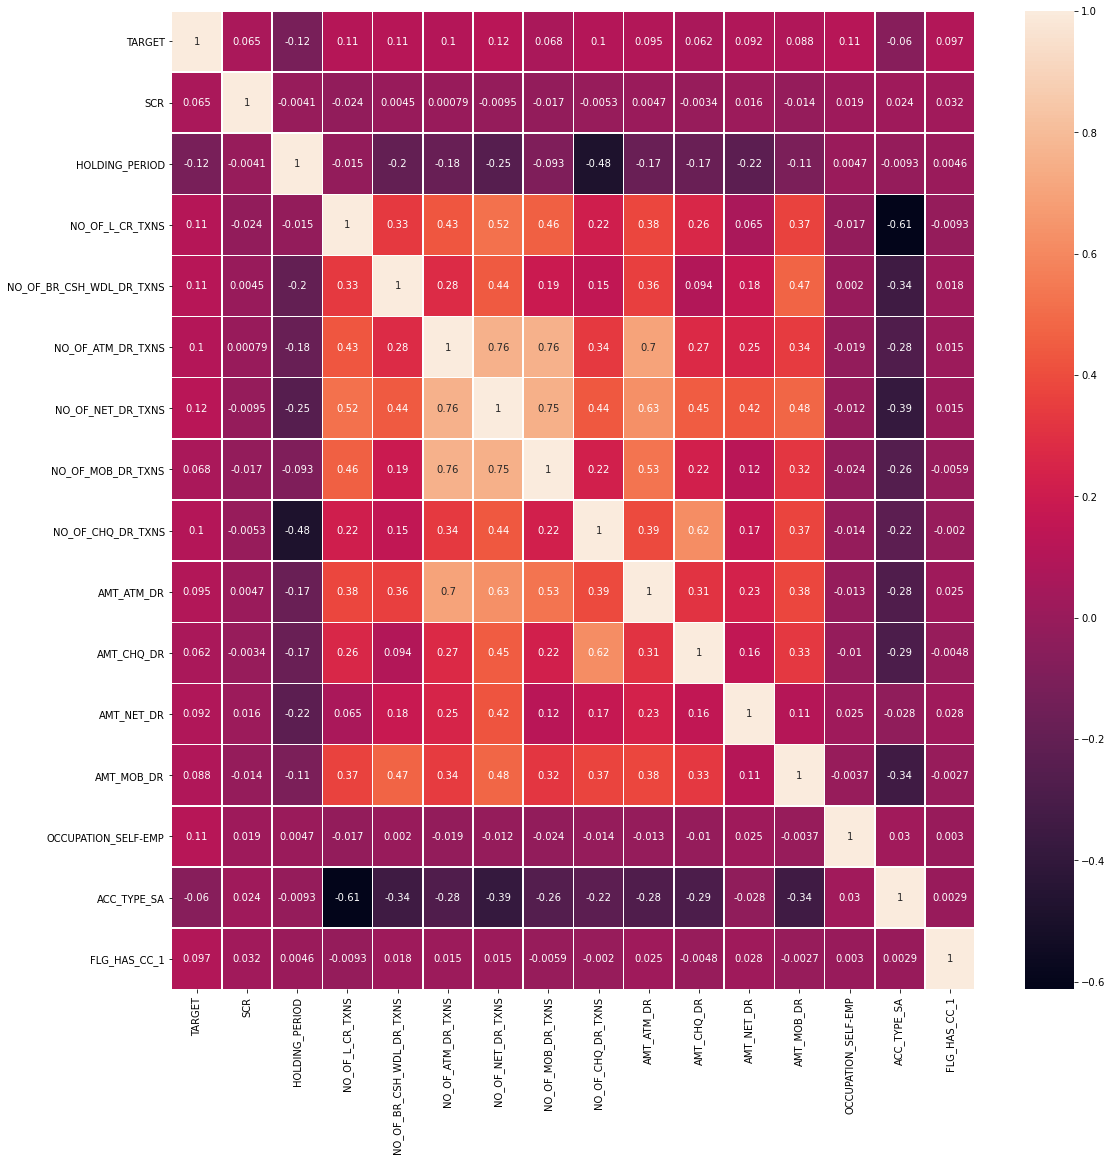

In [29]:
fig, ax = plt.subplots(figsize=(18,18)) 
sns.heatmap(data=main_data.corr(), annot=True, linewidths=.5, ax=ax)
plt.show()

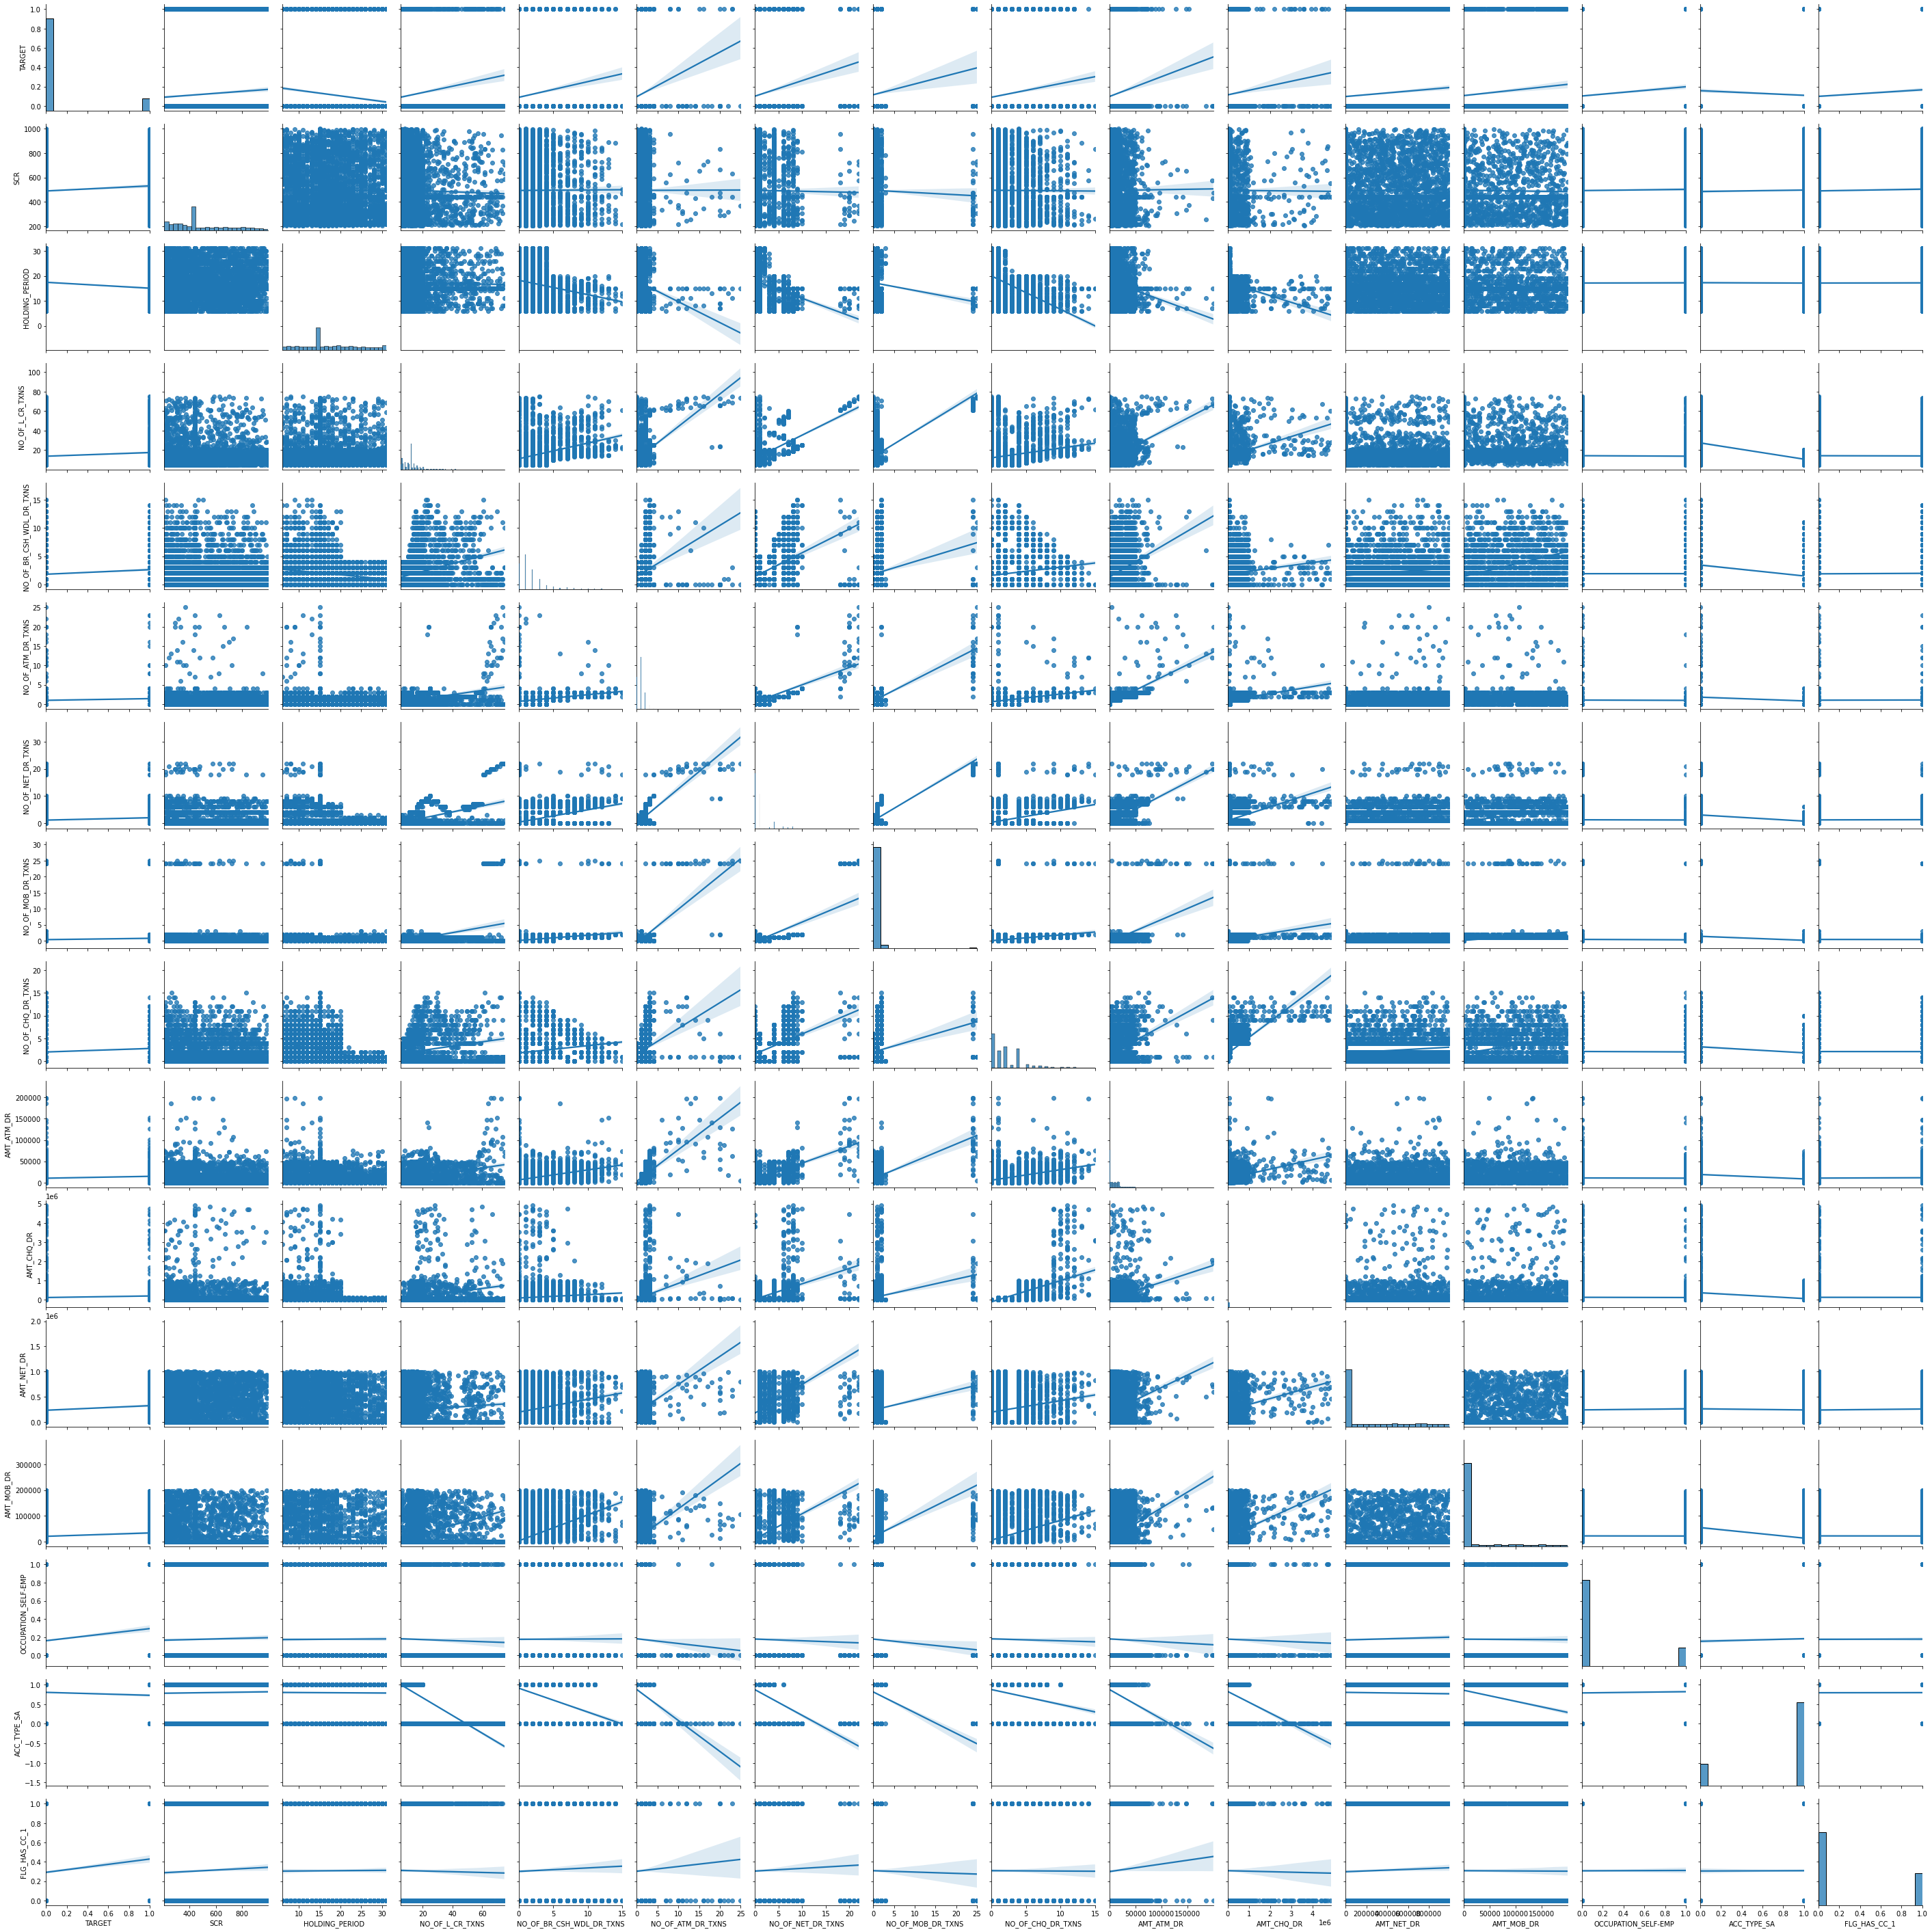

In [30]:
sns.pairplot(main_data, kind="reg")

####  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> 3. Building Decision Tree Model and Analysis:

In [31]:
X = main_data.drop("TARGET", axis=1)
Y = main_data.pop("TARGET")
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [32]:
feature_names = list(X.columns)
print(feature_names)

['SCR', 'HOLDING_PERIOD', 'NO_OF_L_CR_TXNS', 'NO_OF_BR_CSH_WDL_DR_TXNS', 'NO_OF_ATM_DR_TXNS', 'NO_OF_NET_DR_TXNS', 'NO_OF_MOB_DR_TXNS', 'NO_OF_CHQ_DR_TXNS', 'AMT_ATM_DR', 'AMT_CHQ_DR', 'AMT_NET_DR', 'AMT_MOB_DR', 'OCCUPATION_SELF-EMP', 'ACC_TYPE_SA', 'FLG_HAS_CC_1']


In [33]:
# Functions to calculate different metrics

def DisplayConfusionMatrix(model, y_actual, labels=[1,0]):
    y_predict = model.predict(x_test)
    confusion_matrix = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    confusion_matix_df = pd.DataFrame(
        confusion_matrix,
        index   = [i for i in ["Actual No", "Actual Yes"]],
        columns = [i for i in ["Predicted - No", "Predicted - Yes"]])
    
    group_counts = ["{0:0.0f}".format(value) for value in confusion_matrix.flatten()]
    group_percetages = ["{0:.2%}".format(value) for value in confusion_matrix.flatten()/np.sum(confusion_matrix)]
    
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percetages)]
    labels = np.array(labels).reshape(2, 2)
    plt.figure(figsize= (10,7))
    sns.heatmap(confusion_matix_df, annot=labels,fmt='')
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    
def GetMetricsScore(model):
    
    pred_train = model.predict(x_train)
    pred_test  = model.predict(x_test)
    
    train_accuracy = model.score(x_train, y_train)
    test_accuracy  = model.score(x_test, y_test)
    
    train_recall = metrics.recall_score(y_train, pred_train)
    test_recall  = metrics.recall_score(y_test, pred_test)
    
    train_precision = metrics.precision_score(y_train, pred_train)
    test_precision  = metrics.precision_score(y_test, pred_test)

    f1_score_train = 2 * ((train_precision * train_recall)/(train_precision + train_recall))
    f1_score_test = 2 * ((test_precision * test_recall)/(test_precision + test_recall))
    
    return {
        'Accuracy_Test'   : test_accuracy,
        'Accuracy_Train'  : train_accuracy,
        'Recall_Test'     : test_recall,
        'Recall_Train'    : train_recall,
        'Precision_Test'  : test_precision,
        'Precision_Train' : train_precision,
        'F1_Score_Train'  : f1_score_train,
        'F1_Score_Test'   : f1_score_test
    }
        

def DisplayImportance(model):
    gini_importances = pd.DataFrame(model.feature_importances_, columns=["Imp"], index=x_train.columns).sort_values(by = "Imp")
    print(gini_importances)
    
def DisplayImportanceChart(model):
    importances = model.feature_importances_
    indices = np.argsort(importances)

    plt.figure(figsize=(12, 12))
    plt.title('Feature Importance')
    plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
    plt.yticks(range(len(indices)), [list(X.columns)[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()
    
def PlotTree(model, size = [20, 30]):
    plt.figure(figsize=(size[0],size[1]))
    tree.plot_tree(model, feature_names=feature_names, filled=True, fontsize=9, node_ids=True, class_names=True)
    plt.show()
    
def PrintCoeficients(model):
    coefs = pd.DataFrame(
        np.append(model.coef_, model.intercept_),
        index=x_train.columns.tolist() + ["Intercept"],
        columns=["Coefficients"],
    )

    coefs.sort_values('Coefficients')

In [34]:
dTree_Model = DecisionTreeClassifier(criterion= 'gini', random_state=1)
dTree_Model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

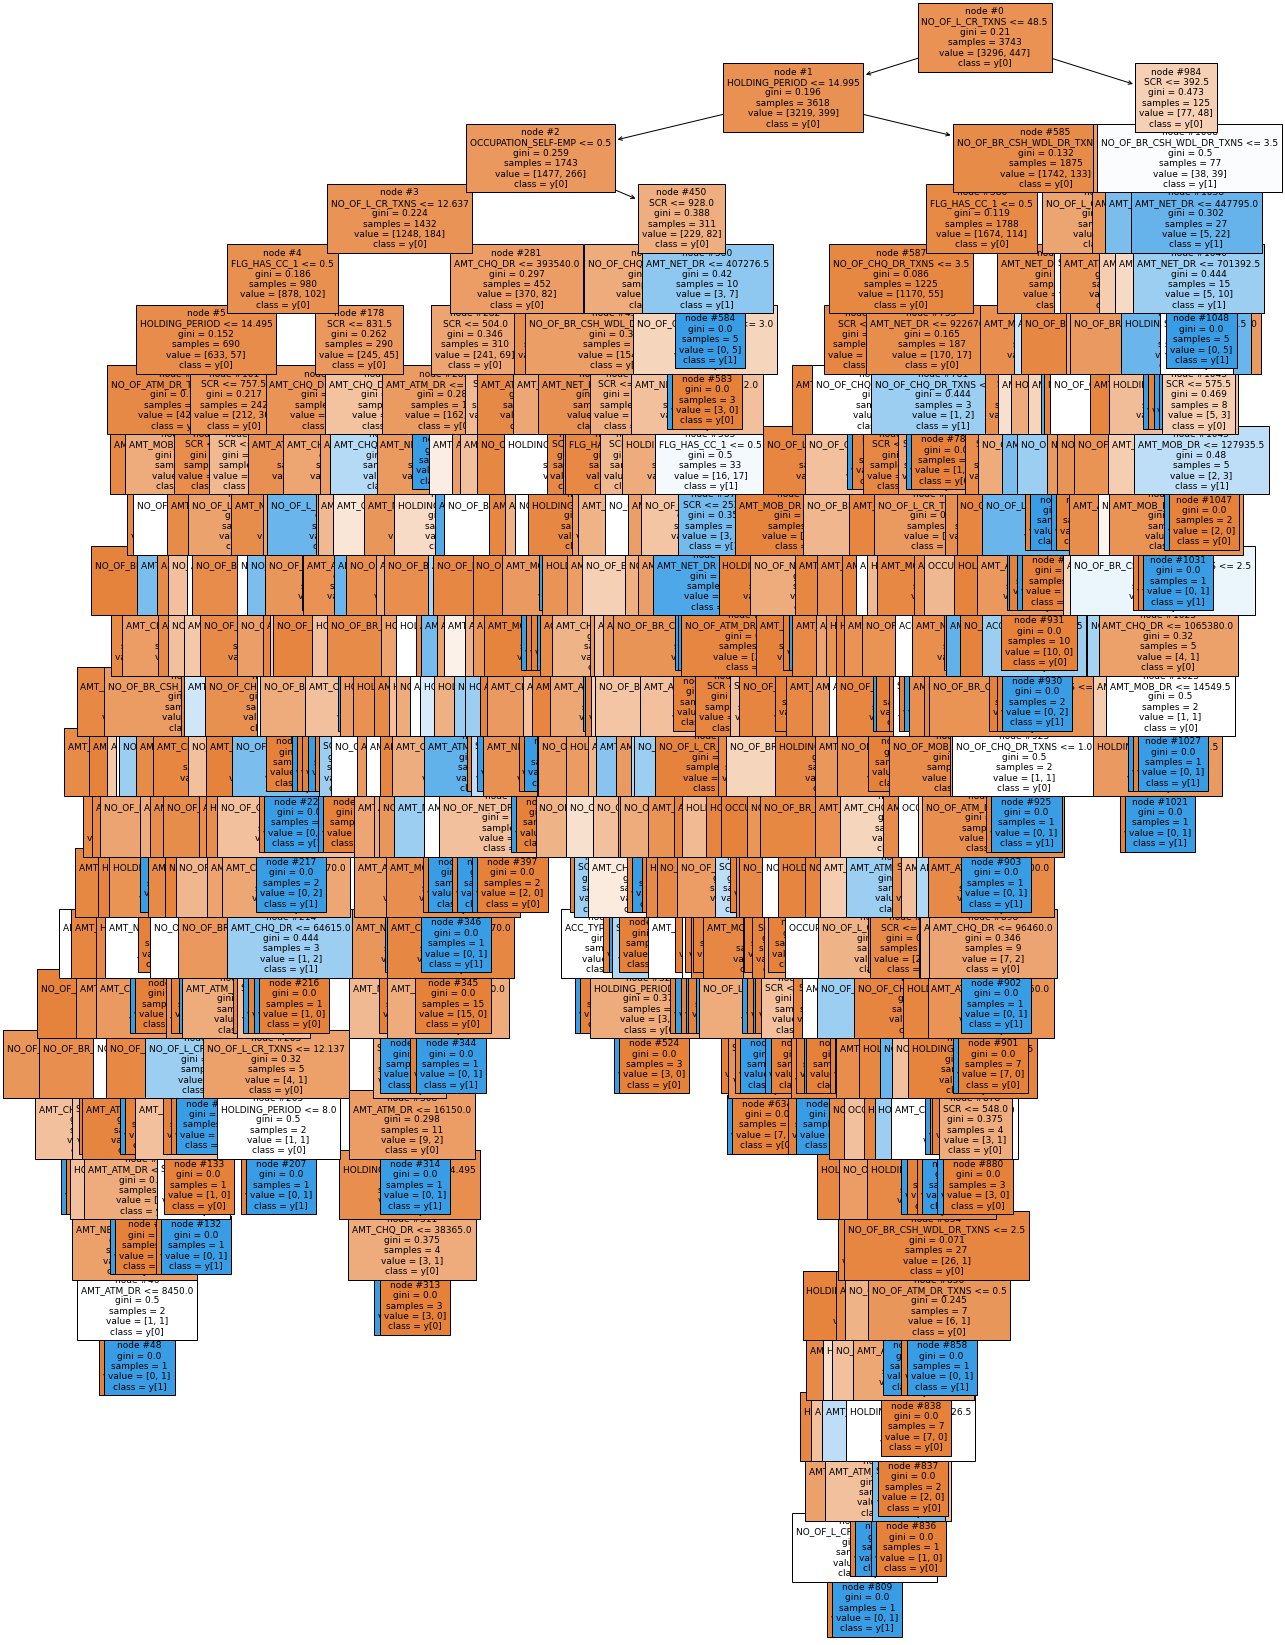

In [35]:
PlotTree(dTree_Model)

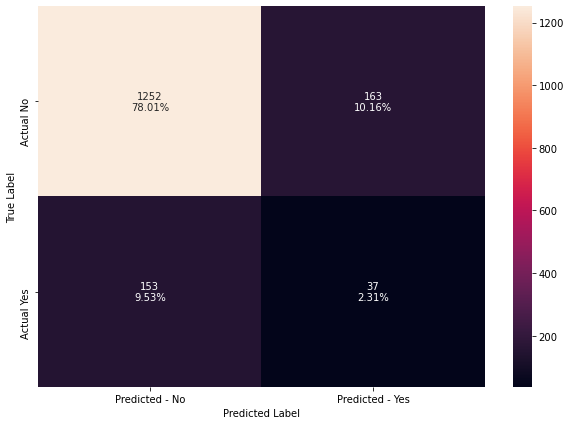

In [36]:
DisplayConfusionMatrix(dTree_Model, y_test)

In [37]:
dTree_model_score = GetMetricsScore(dTree_Model)
pprint.pprint(dTree_model_score)

{'Accuracy_Test': 0.8031152647975078,
 'Accuracy_Train': 1.0,
 'F1_Score_Test': 0.18974358974358974,
 'F1_Score_Train': 1.0,
 'Precision_Test': 0.185,
 'Precision_Train': 1.0,
 'Recall_Test': 0.19473684210526315,
 'Recall_Train': 1.0}


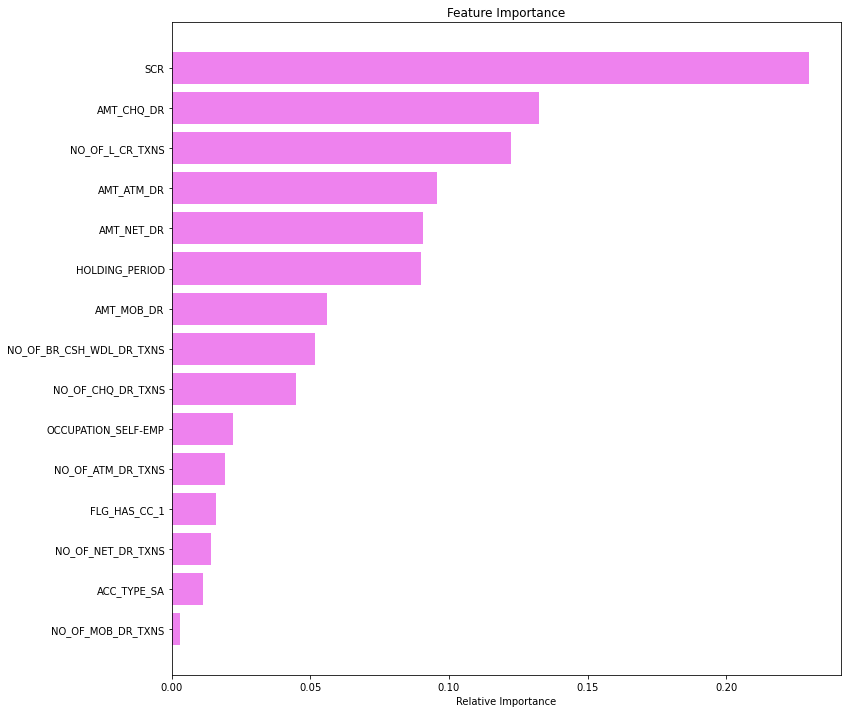

In [38]:
DisplayImportanceChart(dTree_Model)

In [51]:

# choose the type of classifier
dTree_Model = DecisionTreeClassifier(random_state=1, criterion= 'gini')

# Grid of params to choose from
parameters = {
    "max_depth": np.arange(1, 20),
    "min_samples_leaf": np.arange(1, 20),
    "max_leaf_nodes" : np.arange(1, 20),
    "min_impurity_decrease": [0.001, 0.01, 0.1]
}

# type of score used to compare paramter combinations
acc_scorer =metrics.make_scorer(metrics.recall_score)

# run the grid search
grid_obj = GridSearchCV(dTree_Model, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# set the clf to the best combination of parameters
dTree_Model = grid_obj.best_estimator_

# fit the best algorithm to the data
dTree_Model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=4,
                       min_impurity_decrease=0.001, min_samples_leaf=18,
                       random_state=1)

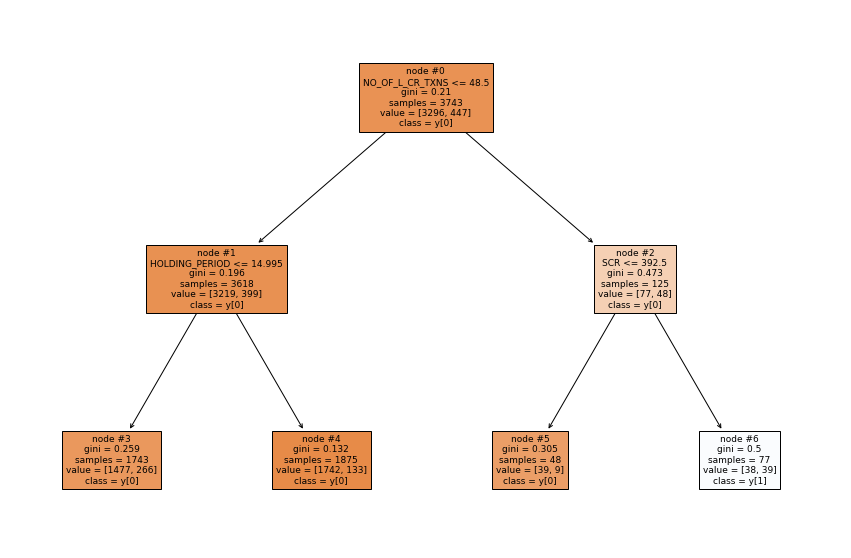

In [56]:
PlotTree(dTree_Model, [15, 10])

In [57]:
dTree_model_score = GetMetricsScore(dTree_Model)
pprint.pprint(dTree_model_score)

{'Accuracy_Test': 0.8672897196261682,
 'Accuracy_Train': 0.8808442425861608,
 'F1_Score_Test': 0.06167400881057268,
 'F1_Score_Train': 0.14885496183206107,
 'Precision_Test': 0.1891891891891892,
 'Precision_Train': 0.5064935064935064,
 'Recall_Test': 0.03684210526315789,
 'Recall_Train': 0.087248322147651}


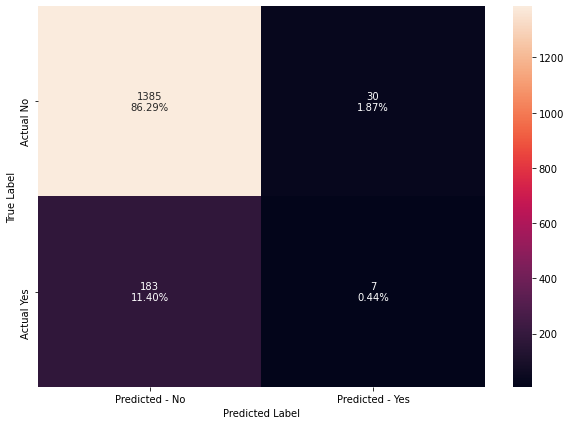

In [58]:
DisplayConfusionMatrix(dTree_Model, y_test)

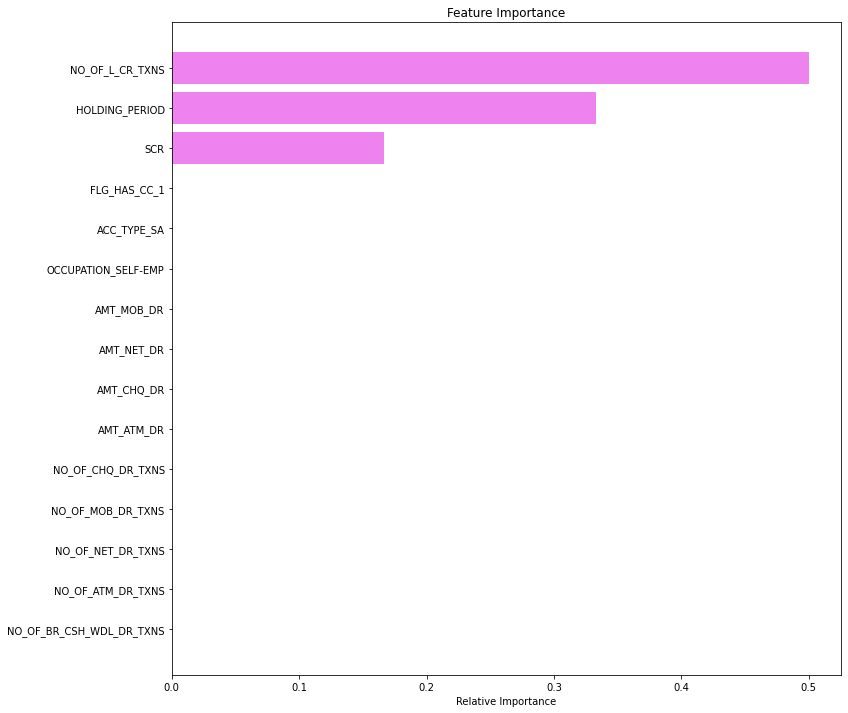

In [55]:
DisplayImportanceChart(dTree_Model)

####  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> 4. Building Logistic Regression Model and Analysis:

In [44]:
# fit model on train
logistic_reg_model = LogisticRegression()
logistic_reg_model.fit(x_train,y_train)

# predict on test
y_predict = logistic_reg_model.predict(x_test)

In [47]:
PrintCoeficients(logistic_reg_model)

In [46]:
logistic_reg_model_score = GetMetricsScore(logistic_reg_model)
pprint.pprint(logistic_reg_model_score)

{'Accuracy_Test': 0.881619937694704,
 'Accuracy_Train': 0.8805770772107935,
 'F1_Score_Test': nan,
 'F1_Score_Train': nan,
 'Precision_Test': 0.0,
 'Precision_Train': 0.0,
 'Recall_Test': 0.0,
 'Recall_Train': 0.0}


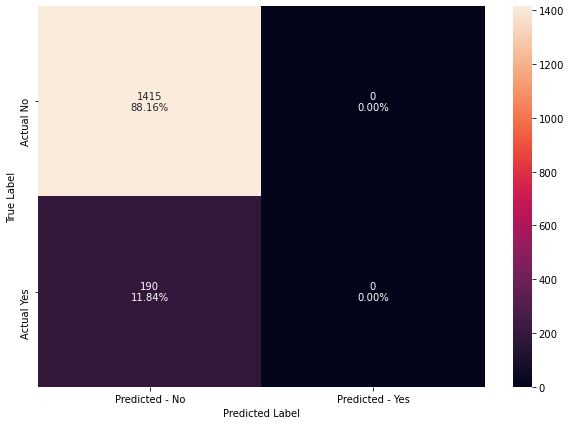

In [48]:
DisplayConfusionMatrix(logistic_reg_model, y_test)